# IMPORTING All REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# LOADING THE DATASET and VISUALIZE

In [2]:
data=pd.read_csv('Diwali_sales.csv',encoding='latin')
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# DATA to DATAFRAME

In [3]:
df =pd.DataFrame(data)
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


# CHECKING FOR NULL VALUES IN DATAFRAME and COUNTS

In [4]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

# NAME OF COLUMNS/FEATURE IN DATAFRAME

In [5]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

# DROPPING DOWN BLANK COLUMNS

In [6]:
df1=df.drop(columns='Status')

In [7]:
new=df1.drop(columns='unnamed1')

# CHECK THE COLUMNS ARE REMOVED 

In [8]:
new.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [9]:
new.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


# AMOUNT COLUMN HAS SOME NULL VALUES

In [10]:
new.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

# FILLED THE NULL VALUE WILL PREVIOUS NON NULL VALUE

In [11]:
new['Amount'].fillna(method='ffill', inplace=True)
new.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [12]:
new.duplicated().value_counts()

False    11243
True         8
dtype: int64

In [13]:
new.drop_duplicates()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [14]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11251 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


# CONVERTING ALL LOWER CASE

In [15]:
new["cust_name"] = new["Cust_name"].str.strip().str.lower()
new["cust_name"].head()

0    sanskriti
1       kartik
2        bindu
3       sudevi
4         joni
Name: cust_name, dtype: object

In [16]:
new["product_Category"] = new["Product_Category"].str.strip().str.lower()
new["occupation"] = new["Occupation"].str.strip().str.lower()
new["zone"] = new["Zone"].str.strip().str.lower()
new["state"] = new["State"].str.strip().str.lower()
new["product_ID"] = new["Product_ID"].str.strip().str.lower()
new["gender"] = new["Gender"].str.strip().str.lower()
new["age group"] = new["Age Group"].str.strip().str.lower()


In [17]:
def find_outliers(new):
    Q1 = new.quantile(0.25)
    Q3 = new.quantile(0.75)
    print(Q1,Q3)
    IQR = Q3 - Q1
    low_limit = Q1 - (1.5 * IQR)
    high_limit = Q3 + (1.5 * IQR)
    outlier_list = ((new[Amount] <=low_limit) | (new[Amount] >= high_limit)).tolist()
    return outlier_list


<Axes: >

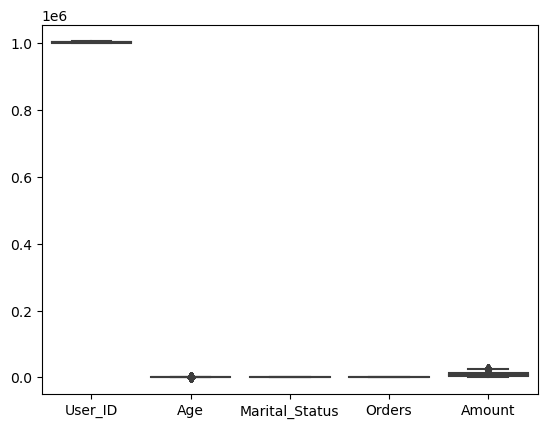

In [18]:
sns.boxplot(new)

In [19]:
new.Amount.clip(new.Amount.quantile(0.25),new.Amount.quantile(0.75),inplace=True)

<Axes: >

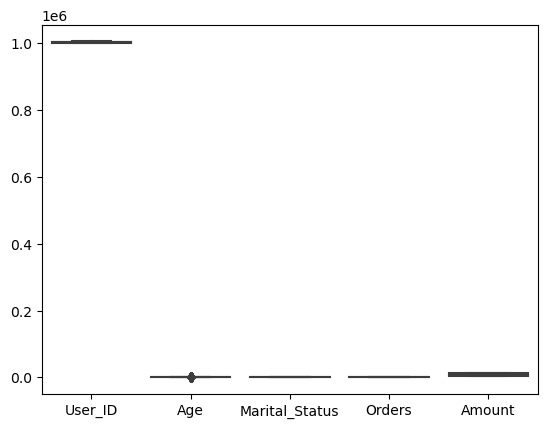

In [20]:
sns.boxplot(new)

# correlation between numeric valued features

C:\Users\22anj\AppData\Local\Temp\ipykernel_13012\577404086.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new.corr(),annot=True)


<Axes: >

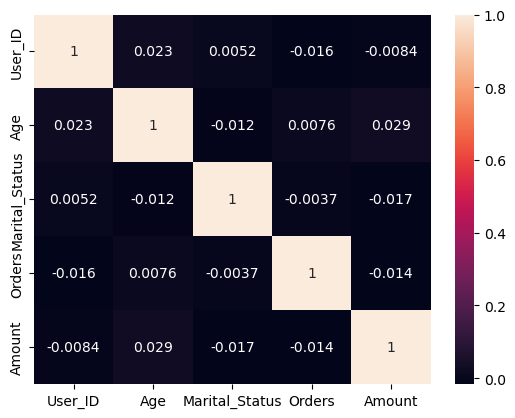

In [21]:
sns.heatmap(new.corr(),annot=True)

In [22]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler

In [23]:
new.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,8864.870323
std,1.716125e+03,12.754122,0.493632,1.115047,2919.020352
min,1.000001e+06,12.000000,0.000000,1.000000,5443.500000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.750000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12691.250000
max,1.006040e+06,92.000000,1.000000,4.000000,12691.500000


In [24]:
df=new[['User_ID','Age','Marital_Status','Orders','Amount']]

In [25]:
df

,User_ID,Age,Marital_Status,Orders,Amount
0,1002903,28,0,1,12691.5
1,1000732,35,1,3,12691.5
2,1001990,35,1,3,12691.5
3,1001425,16,0,2,12691.5
4,1000588,28,1,2,12691.5
...,...,...,...,...,...
11246,1000695,19,1,4,5443.5
11247,1004089,33,0,3,5443.5
11248,1001209,40,0,4,5443.5
11249,1004023,37,0,3,5443.5


In [26]:
y=df['Marital_Status']

In [27]:
x=df.drop('Marital_Status',axis=1)

In [28]:
x

,User_ID,Age,Orders,Amount
0,1002903,28,1,12691.5
1,1000732,35,3,12691.5
2,1001990,35,3,12691.5
3,1001425,16,2,12691.5
4,1000588,28,2,12691.5
...,...,...,...,...
11246,1000695,19,4,5443.5
11247,1004089,33,3,5443.5
11248,1001209,40,4,5443.5
11249,1004023,37,3,5443.5


# STANDARDIZING USING MEAN AND STANDARD

In [29]:
std_x=(x-x.mean())/x.std() 
std_x


,User_ID,Age,Orders,Amount
0,-0.059138,-0.581867,-1.335630,1.310929
1,-1.324197,-0.033025,0.458017,1.310929
2,-0.591150,-0.033025,0.458017,1.310929
3,-0.920380,-1.522740,-0.438806,1.310929
4,-1.408107,-0.581867,-0.438806,1.310929
...,...,...,...,...
11246,-1.345757,-1.287522,1.354840,-1.172095
11247,0.631954,-0.189837,0.458017,-1.172095
11248,-1.046245,0.359005,1.354840,-1.172095
11249,0.593495,0.123787,0.458017,-1.172095


<Axes: >

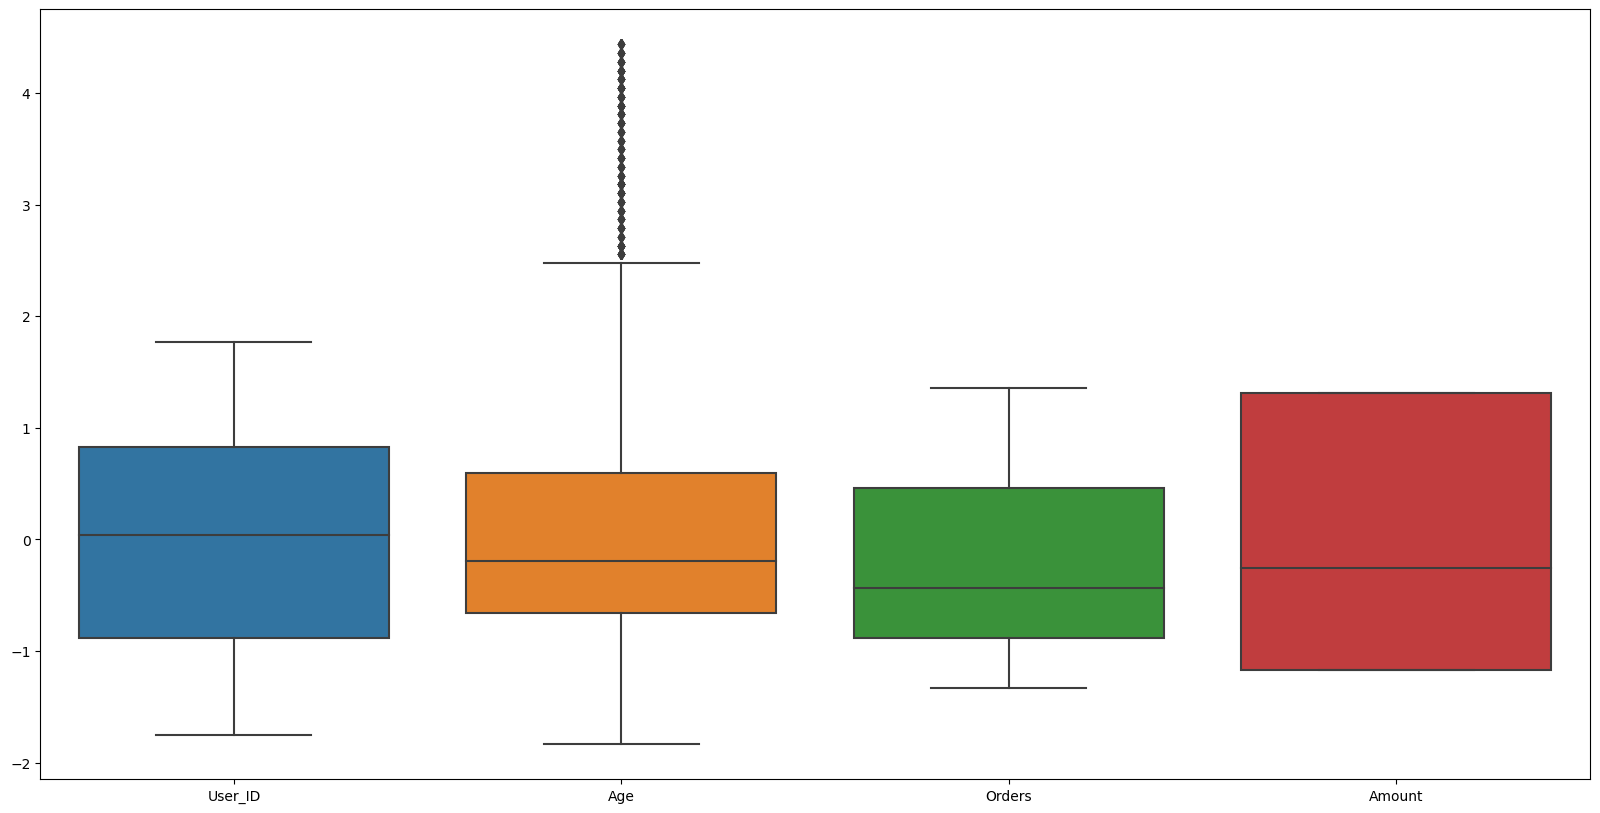

In [30]:
plt.figure(figsize=(20,10))
sns.boxplot(std_x)

# NORMALIZATION OF DATA

In [31]:
# NORM_new=(new-new.mean())/(new.max()-new.min())
# NORM_new

#solution to remove the columns with non integer value

In [32]:
x['Amount'] = x['Amount'].astype('int')

<Axes: xlabel='Gender', ylabel='count'>

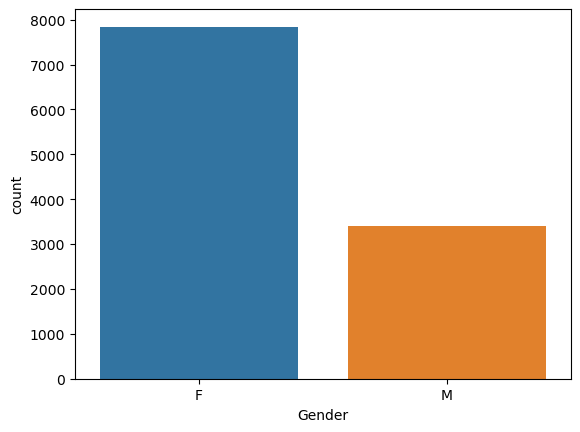

In [33]:
sns.countplot(x='Gender',data=new)

<Axes: xlabel='Age Group', ylabel='count'>

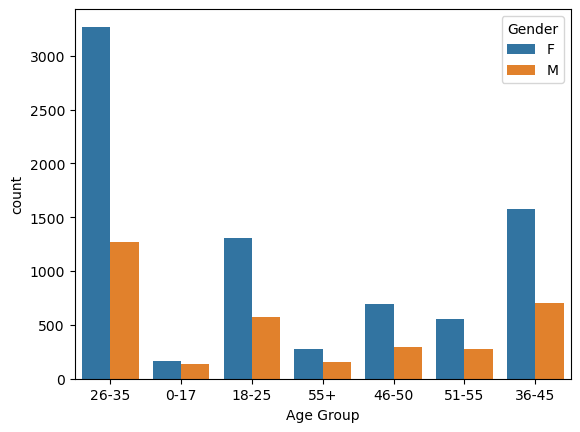

In [34]:
sns.countplot(x='Age Group',hue='Gender',data=new)

<Axes: xlabel='State', ylabel='count'>

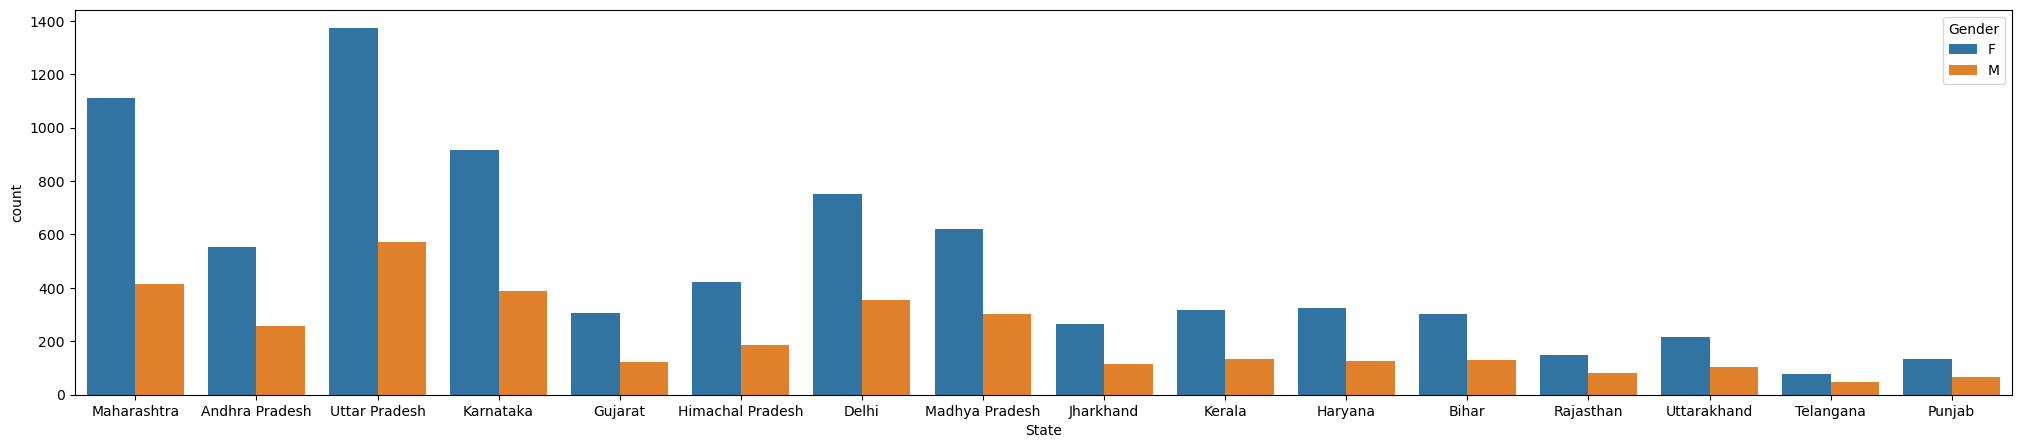

In [35]:
plt.figure(figsize=(25,5))
sns.countplot(x='State',hue='Gender',data=new)

Most of the orders are from Uttar Pradesh, then Maharashtra and then Karnataka

<Axes: xlabel='State', ylabel='Orders'>

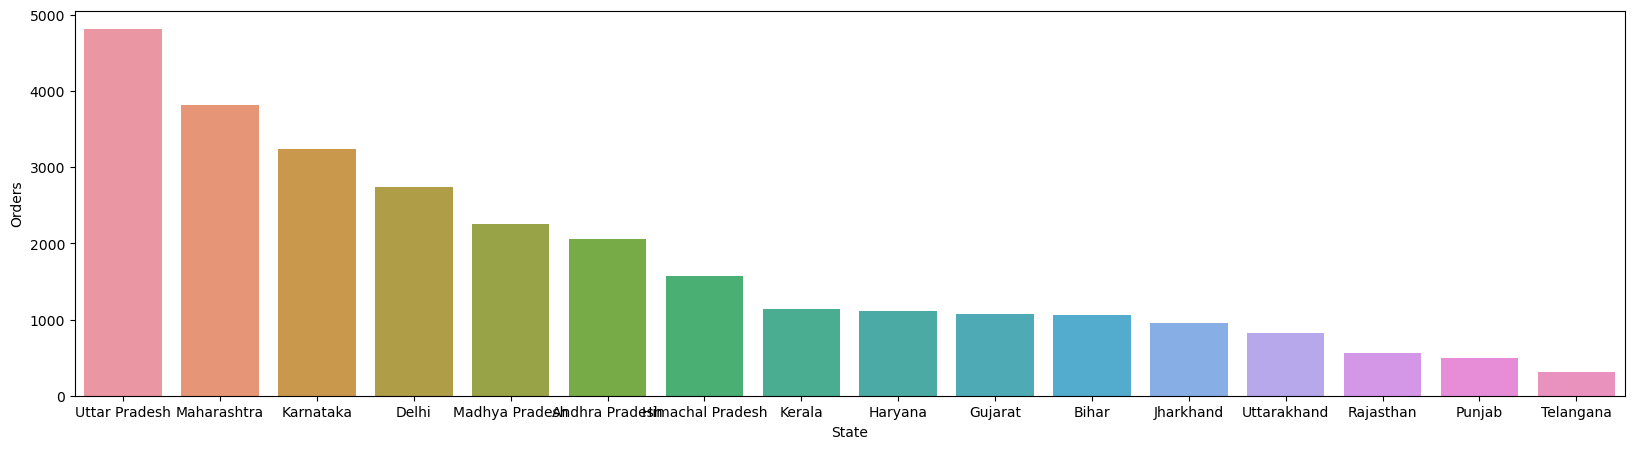

In [36]:
state_order = new.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)

plt.figure(figsize=(20,5))
sns.barplot(data = state_order, x = 'State',y= 'Orders')

<Axes: xlabel='Age Group', ylabel='count'>

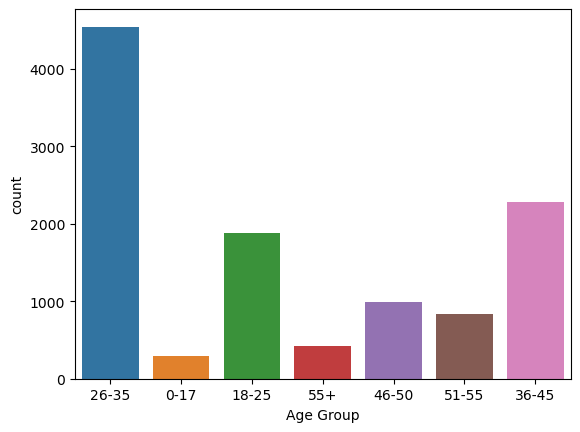

In [37]:
sns.countplot(x='Age Group',data=new)

 Most of the purchasers are the age of 26-35.

<Axes: xlabel='Age Group', ylabel='Amount'>

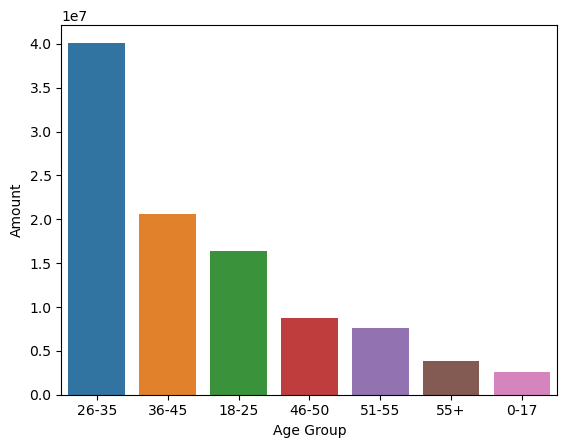

In [38]:
sales_age =new.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Age Group',y='Amount',data=sales_age)

Most of the buyers are between the age of 26 to 35 and the most are females

<Axes: xlabel='Marital_Status', ylabel='Amount'>

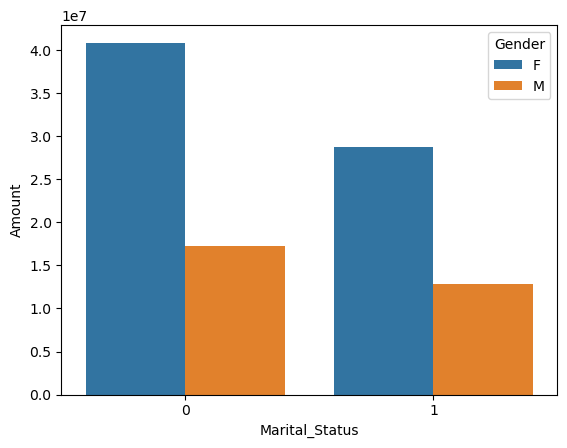

In [39]:
sales_state = new.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(data=sales_state,x='Marital_Status',y='Amount',hue='Gender')

From above graph we can say that the most of the buyers are married(women) and they have high purchasing power.

<Axes: xlabel='Occupation', ylabel='count'>

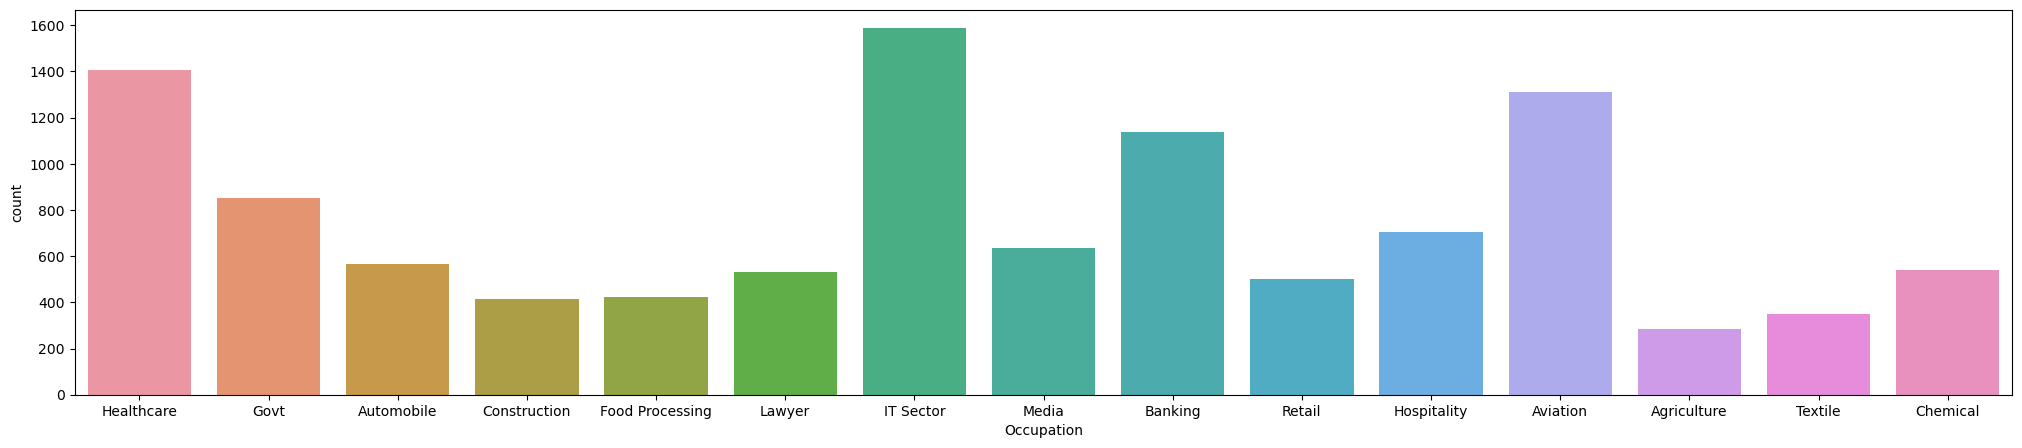

In [40]:
plt.figure(figsize=(25,5))
sns.countplot(data=new,x='Occupation')

From above graph we can say that most of the buyers are from IT, HealthCare and Aviation Sector.

<Axes: xlabel='Product_Category', ylabel='count'>

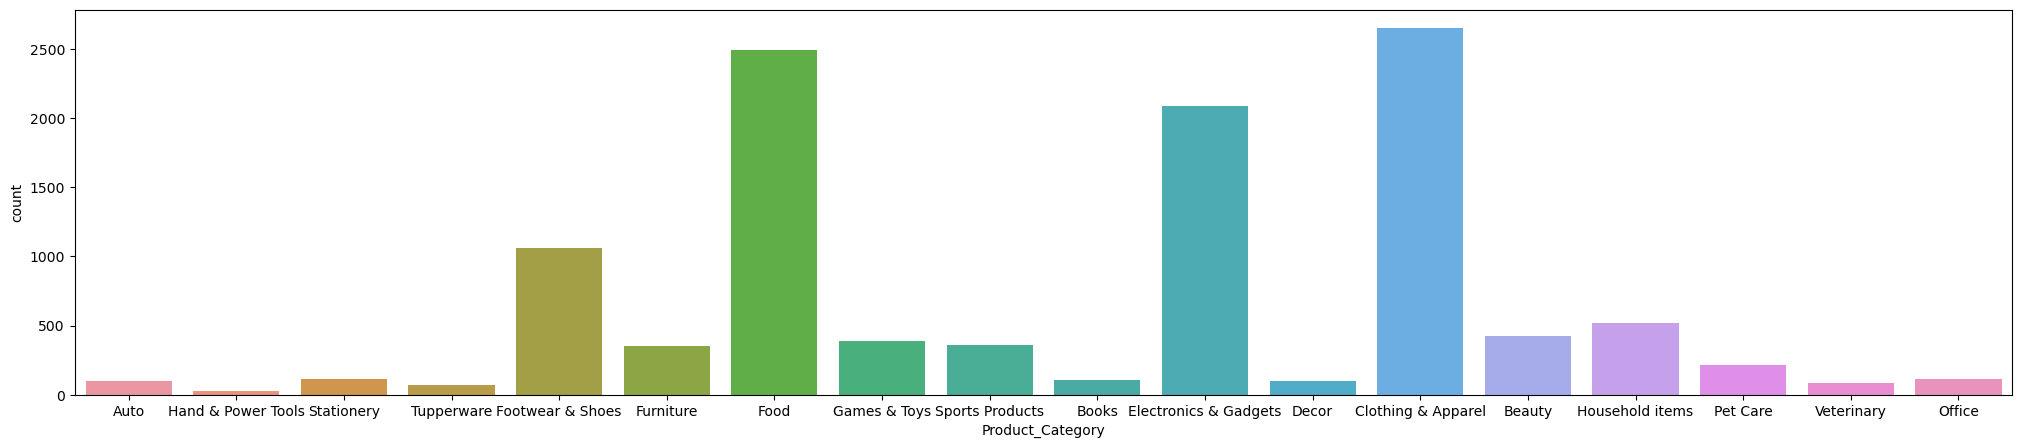

In [41]:
plt.figure(figsize=(25,5))
sns.countplot(data=new,x='Product_Category')

<Axes: xlabel='Product_Category', ylabel='Amount'>

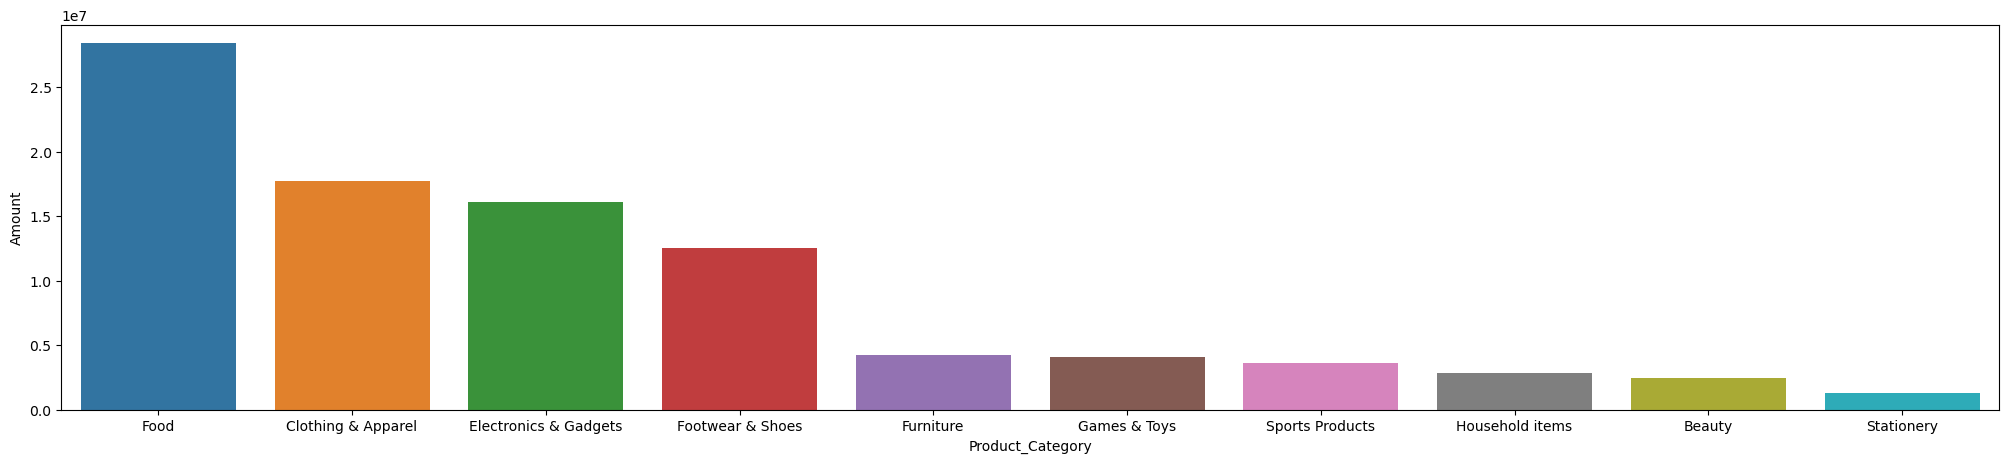

In [42]:
plt.figure(figsize=(25,5))
sales_cat = new.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount' , ascending=False).head(10)
sns.barplot(data=sales_cat,x='Product_Category',y='Amount')

From above graphs we can say that most of the sold products are from food, clothing, and Electronics catagory.

conclusion:

    Married women age group btw 26-35 years from UP, Maharashtra, and Karnataka working in IT, Healthcare, and Aviation sector are more likely to buy products from Food, Clothing, and Electronics category.